<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1) Прочитайте данные с помощью библиотеки Pandas.

In [3]:
"""Чтение файла.
В качестве разделителя в csv-файле указана ';'
"""
hh_data = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1RklOSUpvnQ-d4hfsIV17YVjHycbXTwbF', sep=';')
hh_data.shape # Количество наблюдений (строк) в dataframe (далее - DF) равно 44744, количество признаков (столбцов) - 12.

(44744, 12)

2) Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
"""В DF включены следующие признаки(формат записи):
1 - "Пол, возраст" (пол, возраст, дата рождения)
2 - "ЗП" (цифра валюта)
3 - "Ищет работу на должность:" (перечисление ряда позиций)
4 - "Город, переезд, командировки" (Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам)
5 - "Занятость" (отмечены форматы занятости (5 категорий))
6 - "График" (отмечены форматы графиков работы (5 категорий))
7 - "Опыт работы" (количество лет/ месяцев работы, периоды работы в различных компаниях…)
8 - "Последнее/ нынешнее место работы" (наименование организации)
9 - "Последняя/ нынешняя должность" (наименование должности)
10 - "Образование и ВУЗ" (уровень образования (степень) год выпуска ВУЗ специальность…)
11 - "Обновление резюме" (дата и время обновления резюме)
12 - "Авто" (наличие авто/ отсутствие информации)
"""
hh_data.tail(5)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3) Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4) Обратите внимание на информацию о числе непустых значений.

In [5]:
"""Вывод информации о количестве непустых значений через .info()
Признаки, в которых число непустых значений меньше 44744, имеют пропуски в данных:
    - Опыт работы
    - Последнее/ нынешнее место работы
    - Последняя/ нынешняя должность
Тип данных: object
"""
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5) Выведите основную статистическую информацию о столбцах.

In [6]:
"""Вывод статистической информации о признаках .describe(), включая анализ нечисловых признаков (object)
В результирующей таблице представлены следующие данные:
    - количество непустых значений по признаку,
    - количество уникальных значений,
    - модальное значение (top),
    - частота модального значения.
"""
hh_data.describe(include=['object'])

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1) **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

In [7]:
"""Преобразование признака "Образование и ВУЗ" в признак "Образование" с 4 категориями уровней образования
"""
def get_education_level(arg):
    """Функция, аргументом которой является строка столбца "Образование и ВУЗ".
    Функция возвращает одну из 4х категорий уровня образования:
        - "высшее",
        - "неоконченное высшее",
        - "среднее специальное",
        - "среднее";
    После проверки на вхождение заданных сочетаний слов в начале строки.
    """
    # Разбиваем строку по пробелам. Обрезаем список, оставляем в нем только 2 первых элемента. Объединяем элементы списка
    arg = ' '.join(arg.split(' ')[:2])
    # Проверяем по условию входит ли указанное сочетание слов в строку и проводим замену значений
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее образование' in arg:
        return 'среднее'
    
    
data_copy = hh_data.copy() # Создаем копию dataframe для последующей обработки
data_copy['Образование'] = data_copy['Образование и ВУЗ'].apply(get_education_level) # Создаем новый признак "Образование"
data_copy = data_copy.drop('Образование и ВУЗ', axis=1) # Удаляем столбец с признаком "Образование и ВУЗ"
print(data_copy['Образование'].value_counts()['среднее']) # Выводим количество соискателей со средним уровнем образования

559


2) **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

(Гарантируется, что структура одинакова для всех строк в таблице.)

In [8]:
"""Преобразование признака "Пол, возраст" в признаки "Пол" (категории М и Ж) и "Возраст"
"""
def get_age(arg):
    """Функция, аргументом которой является строка столбца "Пол, возраст".
    Функция возвращает значение возраста соискателя в формате целого числа (int64).
    """
    key_words=['год', 'года', 'лет'] # создаем список ключевых слов
    arg_splitted = arg.split(' ') # разбиваем строку по пробелам. Получаем список
    for index, item in enumerate (arg_splitted): # проходим по индексу и значению элемента списка
        if item in key_words:
            # проверяем условие: если элемент входит в список ключевых слов, то позиция значения возраста соответствует предыдущему индексу 
            return int(arg_splitted[index-1])
        
        
"""Создаем новый признак "Пол", применяя lambda-функцию:
    -> разбиваем строку по пробелам,
    -> вычленяем первый ([0]) элемент из списка (пол),
    -> вычленяем первую букву элемента ([0]) - М/ Ж.
""" 
data_copy['Пол'] = data_copy['Пол, возраст'].apply(lambda x: x.split(' ')[0][0]) 
data_copy['Возраст'] = data_copy['Пол, возраст'].apply(get_age) # Создаем новый признак "Возраст"
data_copy = data_copy.drop('Пол, возраст', axis=1)
print(round(data_copy['Пол'].value_counts(normalize=True)['Ж'], 4)*100) # Расчет доли соискателей женского пола 
print(round(data_copy['Возраст'].mean(), 1)) # Расчет среднего значения возраста соискателей

19.07
32.2


3) **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

* Во-первых, в данном признаке есть пропуски. Если встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

В результате преобразования должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.

In [9]:
"""Преобразование признака "Опыт работы" в признак "Опыт работы (месяц)"
"""
def get_experience(arg):
    """Функция, аргументом которой является строка столбца Опыт работы. 
    Функция возвращает опыт работы в месяцах.
    """
    if arg is np.nan or arg == 'Не указано': # Заполнение пропусков NaN
        return None
    
    years_list = ['лет', 'год', 'года'] # Создаем список ключевых слов для вычленения количества лет работы
    months_list = ['месяц', 'месяца', 'месяцев'] # Создаем список ключевых слов для вычленения количества месяцев работы
    arg_list = arg.split(' ')[:6]
    years = 0
    months = 0
    for index, item in enumerate (arg_list): # проходим по индексу и значению элемента списка
        if item in years_list: # проверяем условие: вхождение элемента в список ключевых слов по годам/ месяцам. Вычленяем числовое значение
            years = int(arg_list[index-1])
        if item in months_list:
            months = int(arg_list[index-1])
            
    return int(years*12 + months)


data_copy['Опыт работы (месяц)'] = data_copy['Опыт работы'].apply(get_experience)
data_copy = data_copy.drop('Опыт работы', axis=1)
print(data_copy['Опыт работы (месяц)'].median()) # Расчет медианного значения количества опыта работы соискателей в месяцах

100.0


4) "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
    
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.


In [10]:
"""Преобразование признака "Город, переезд, командировки" в признаки "Город", "Готовность к переезду", "Готовность к командировкам"
"""
def get_city_group(arg):
    """Функция, аргументом которой является строка столбца "Город, переезд, командировки".
    Функция возвращает одну из четырех категорий значения города:
        - Москва,
        - Санкт-Петербург,
        - город-миллионник,
        - другие.
    """
    # создаем список городов-миллионников
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                  'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону',
                  'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                  ]
    city_name = arg.split(' , ')[0] # разбиваем строку по пробелам с запятой. Вычленяем из полученного списка первый элемент [0]
    # проверяем условие и проводим замену значений названия города по четырем категориям
    if city_name == 'Москва': 
        return 'Москва'
    elif city_name == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city_name in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
    

def get_ready_to_relocate(arg):
    """Функция, аргументом которой является строка столбца "Город, переезд, командировки". 
    Функция возвращает True (готов)/ False (не готов) в новом признаке "Готовность к переезду"
    """
    # проверяем условие на вхождение заданных словосочетаний в строку
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True


def get_ready_for_bisiness_trips(arg):
    """Функция, аргументом которой является строка столбца "Город, переезд, командировки". 
    Функция возвращает True (готов)/ False (не готов) в новом признаке "Готовность к командировкам"
    """
    # проверяем условие на вхождение заданных словосочетаний в строку
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
            return False
        else:
            return True
    else: # если информация отсутствует, то считаем, что соискатель НЕ готов к командировкам
        return False
    
    
"""
Создаем 3 новых признака: Город, Готовность к переезду, Готовность к командировкам
"""
data_copy['Город'] = data_copy['Город, переезд, командировки'].apply(get_city_group)
data_copy['Готовность к переезду'] = data_copy['Город, переезд, командировки'].apply(get_ready_to_relocate)
data_copy['Готовность к командировкам'] = data_copy['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
data_copy = data_copy.drop('Город, переезд, командировки', axis=1)

"""
Расчет доли соискателей, проживающих в Санкт-Петербурге
Расчет доли соискателей, готовых к командировкам и к переезду
"""
print(data_copy['Город'].value_counts(normalize=True))
print(data_copy[data_copy['Готовность к командировкам'] & data_copy['Готовность к переезду']].shape[0] / data_copy.shape[0] * 100)

Москва              0.371469
другие              0.354327
город-миллионник    0.163866
Санкт-Петербург     0.110339
Name: Город, dtype: float64
31.86572501340962


5) **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу.

Создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

(Метод преобразования категориальных признаков One Hot Encoding. Его схема представлена на рисунке ниже:)
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

In [11]:
"""Преобразование категориальных признаков "Занятость" и "График" (One Hot Encoding)
-> создание признаков-мигалок для каждой категории. Если отмечен соискателем, то True; если нет - False.
"""
# Создаем списки с ключевыми словами категорий по Занятости и Графику работы
employment_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
chart_list = ['полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод']
# Проходим по элементам категорий Занятости и Графика в кортеже из двух списков (где элементы объединены по индексу)
for employment, chart in zip(employment_list, chart_list):
    # Создаем признаки-мигалки (10 дополнительных столбцов) со значениями True/ False
    data_copy[employment] = data_copy['Занятость'].apply(lambda x: employment in x)
    data_copy[chart] = data_copy['График'].apply(lambda x: chart in x)

"""
Удаляем столбцы с признаками "Занятость" и "График"
"""
data_copy = data_copy.drop('Занятость', axis=1)
data_copy = data_copy.drop('График', axis=1)
"""
Расчет количества соискателей, которые выбирают И проектную работу, И волонтерство
Расчет количества соискателей, которые выбирают И вахтовый метод, И гибкий график
"""
print(data_copy[data_copy['проектная работа'] & data_copy['волонтерство']].shape[0])
print(data_copy[data_copy['вахтовый метод'] & data_copy['гибкий график']].shape[0])

436
2311


6) **"ЗП"** Помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях.

Обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Готова выгрузка курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019.

Создайте новый DataFrame из полученного файла.

Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


В признаке **"Обновление резюме"** содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

In [12]:
"""Преобразование признака "ЗП" в признак "ЗП (руб)".

1 - Чтение файла с данными о курсах различных валют и акций за указанные периоды (DF - exchange_df).
Признаки, необходимые для дальнейшего анализа:
    - "currency" - наименование валюты в ISO кодировке,
    - "date" - дата, 
    - "proportion" - пропорция, 
    - "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).
2 - Приведение значений с датой в единый формат - datetime64:
    * столбец 'date' в DF exchange_df
    * столбец 'Обновление резюме' в DF data_copy (вычленяем ТОЛЬКО дату)
3 - Создаем временные признаки "ЗП (temp)" и "Курс (temp)":
    - применяем lambda-функцию для вычленения числового значения ожидаемой зп [0] и наименования валюты [1].
4 - Преобразуем наименование валюты в признаке "Курс (temp)" в стандарт ISO (по словарю)
5 - Объединим таблицы методом merge() по столбцам с датой и названием валюты:
    - столбцу "Курс (temp)" из df data_copy соответствует столбец "currency" из exchange_df,
    - столбцу "Обновление резюме" - столбец 'date'
    - тип объединения - left
6 - Заполняем пропуски в столбце "close" и "proportion" значением "1" (курс рубля самого к себе)
"""
exchange_df = pd.read_csv('data/ExchangeRates.csv', sep=',')
exchange_df = exchange_df.drop(['per', 'time', 'vol'], axis=1)

data_copy['Обновление резюме'] = pd.to_datetime(data_copy['Обновление резюме'], dayfirst=True).dt.date
exchange_df['date'] = pd.to_datetime(exchange_df['date'], dayfirst=True).dt.date

data_copy['ЗП (tmp)'] = data_copy['ЗП'].apply(lambda x: float(x.split(' ')[0]))
data_copy['Курс (tmp)'] = data_copy['ЗП'].apply(lambda x: x.split(' ')[1])

currency_list = {
    'руб.': 'RUB', 'KZT': 'KZT',
    'USD': 'USD', 'бел.руб.': 'BYN',
    'EUR': 'EUR', 'грн.':'UAH',
    'сум': 'UZS', 'KGS': 'KGS',
    'AZN': 'AZN'
}
data_copy['Курс (tmp)'] = data_copy['Курс (tmp)'].apply(lambda x: currency_list[x] if x in currency_list else x)

merged = data_copy.merge(
    exchange_df,
    left_on = ['Курс (tmp)', 'Обновление резюме'],
    right_on = ['currency', 'date'],
    how = 'left'
)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)

"""
Создаем новый признак "ЗП (руб)" ((присоединенный курс валюты (close) * желамая зп) / пропорция).
Удаляем столбцы с признаками 'ЗП', 'ЗП (tmp)', 'Курс (tmp)'.
"""
data_copy['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']
data_copy = data_copy.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1)

print(data_copy['ЗП (руб)'].median()) # Расчет медианного значения желаемой заработной платы (в рублях)

59019.0


# Исследование зависимостей в данных

1) Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

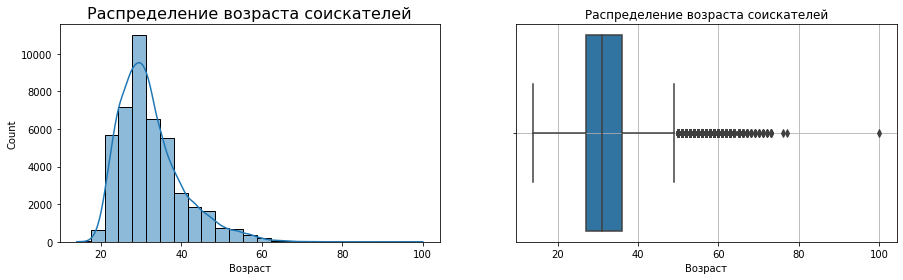

In [13]:
"""Исследование распределения признака "Возраст".
Способ визуализации данных - Гистограмма и Коробчатая диаграмма. Библиотека Seaborn.
"""
# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

# построение Гистограммы
sns.histplot(
    data=data_copy,
    x='Возраст',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение возраста соискателей', fontsize=16);
axes[0].set_xlabel('Возраст')

# построение коробчатой диаграммы
sns.boxplot(
    data=data_copy,
    x='Возраст',
    orient='h',
    width=0.9,
    ax=axes[1]
);
axes[1].set_title('Распределение возраста соискателей');
axes[1].set_xlabel('Возраст');
axes[1].grid()

data_copy['Возраст'].describe()

## КОММЕНТАРИИ
* В представленной выгрузке вакансий hh.ru наиболее часто встречаются соискатели в возрасте 30 лет;

* Условное минимальное значение границы распределения - 14 лет. Условное max - 49 лет;
    
* Возраст большинства соискателей находится в диапазоне от 27 до 36 лет (значения от Q1 до Q3).

* При этом наблюдаются значения возраста за пределами условного max значения границы распределения:
    - от 50 до 77 лет, и единичное значение - 100 лет.

Так называемые "выбросы" после верхней границы допустимы. Однако присутствие анкеты соискателя в возрасте 100 лет вызывает вопрос. Если рассмотреть анкету данного соискателя более подробно, то мы увидим, что опыт его работы составляет около 3х лет, что тоже неправдоподобно.

2) Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

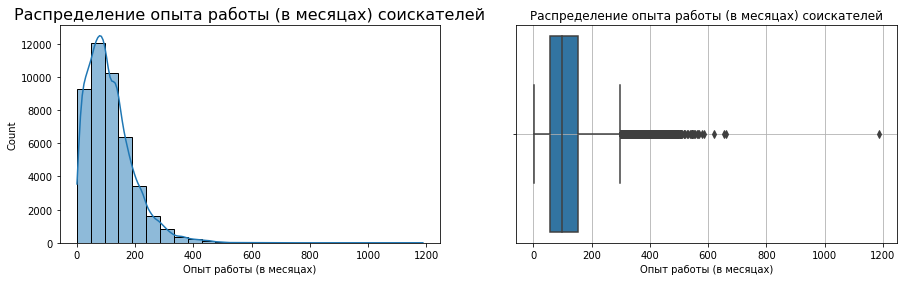

In [14]:
"""Исследование распределения признака "Опыт работы (месяц)".
Способ визуализации данных - Гистограмма и Коробчатая диаграмма. Библиотека Seaborn.
"""
# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

# построение Гистограммы
sns.histplot(
    data=data_copy,
    x='Опыт работы (месяц)',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение опыта работы (в месяцах) соискателей', fontsize=16);
axes[0].set_xlabel('Опыт работы (в месяцах)')

# построение Коробчатой диаграммы
sns.boxplot(
    data=data_copy,
    x='Опыт работы (месяц)',
    orient='h',
    width=0.9,
    ax=axes[1]
);
axes[1].set_title('Распределение опыта работы (в месяцах) соискателей');
axes[1].set_xlabel('Опыт работы (в месяцах)');
axes[1].grid()

data_copy['Опыт работы (месяц)'].describe()

## КОММЕНТАРИИ
* В представленной выгрузке вакансий hh.ru наиболее часто встречаются соискатели с опытом работы около 7 лет (81 месяц);

* Условное минимальное значение границы распределения - 1 месяц. Условное max - 25 лет (299 месяцев);
    
* Опыт работы большинства соискателей находится в диапазоне от 5 до 13 лет (57 и 154 месяца соответственно).

* При этом отмечаются значения опыта работы за пределами условного max значений границы распределения:
    - от 25 до 50 лет (300 и 600 месяцев соответственно),
    - единичное значение - 99 лет (1188 месяцев).

 -> Необходимо изучить отдельно наблюдения, где опыт работы более 35 лет: какие позиции и специальность описана в анкете. (Существовала ли данная специальность в указанные периоды?)
 -> Наблюдение, где опыт работы составляет 99 лет можно отнести к аномалиям. При необходимости удалить строку.

3) Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

count    4.474400e+04
mean     7.653354e+04
std      1.359315e+05
min      1.000000e+00
25%      3.708220e+04
50%      5.901900e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64

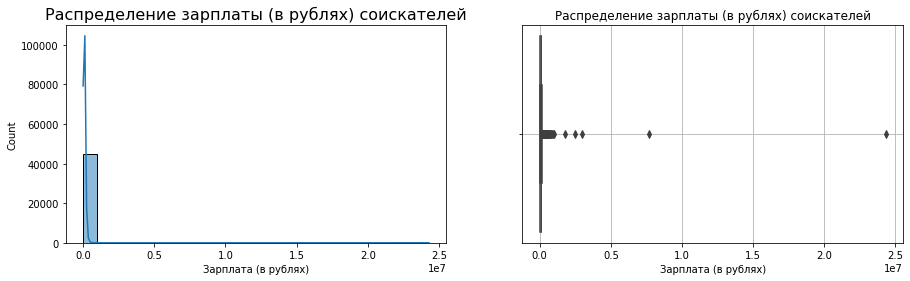

In [15]:
"""Исследование распределения признака "ЗП (руб)".
Способ визуализации данных - Гистограмма и Коробчатая диаграмма. Библиотека Seaborn.
"""
# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

# построение Гистограммы
sns.histplot(
    data=data_copy,
    x='ЗП (руб)',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение зарплаты (в рублях) соискателей', fontsize=16);
axes[0].set_xlabel('Зарплата (в рублях)')

# построение Коробчатой диаграммы
sns.boxplot(
    data=data_copy,
    x='ЗП (руб)',
    orient='h',
    width=0.9,
    ax=axes[1]
);
axes[1].set_title('Распределение зарплаты (в рублях) соискателей');
axes[1].set_xlabel('Зарплата (в рублях)');
axes[1].grid()

data_copy['ЗП (руб)'].describe()

## КОММЕНТАРИИ
Это типичный график распределения с выбросами в данных.
* Гистограмма автоматически выбирает число столбцов, необходимое для наилучшей визуализации распределения. Здесь же мы видим, что значение желаемой зарплаты растянулось до 2.4 * 10 ** 7 (около 24 млн.руб.)
    - Уровень желаемой зарплаты большинства соискателей находится в диапазоне от 37 тыс.руб. до 95 тыс.руб.
    - Наиболее часто встречается значение равное 50 тыс.руб.

* Коробчатая диаграмма получилась сплюснутая под весом выбросов. Она помогает более чётко увидеть потенциальные аномалии, которые находятся за пределами усов (1.5 межквартильных размаха). Здесь же визуально отмечаются 5 наблюдений.

4) Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [16]:
"""Исследование зависимости медианной желаемой ЗП от уровня Образования.
Способ визуализации данных - Столбчатая диаграмма. Библиотека Plotly.

Отфильтровываем данные по условию ЗП (руб) < 1000000.
Группируем данные по признаку Образование с расчетом медианного значения ЗП (руб)
"""
mask = data_copy['ЗП (руб)'] < 1000000
bar_data = data_copy[mask].groupby(
    by='Образование',
    as_index=False
)['ЗП (руб)'].median()

# Построение графика (Plotly) - столбчатая диаграмма
fig = px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП (руб)',
    barmode='group',
    orientation='v',
    title='Зависимость медианной желаемой зарплаты от Уровня образования'
);
fig.write_image("data/fig1.png")

<center> <img src=https://raw.githubusercontent.com/LiliyaKazykhanova/SF-DS-Project-1/main/project_1/data/fig1.png>

## КОММЕНТАРИИ
* Наибольший уровень желаемой зарплаты отмечается у соискателей с высшим образованием;
* Наименьший уровень желаемой зарплаты отмечается у соискателей со средним и средним специальным образованием;
* Согласно внешним исследованиям единственная ступень образования, которая действительно сказывается на заработной плате – высшее профессиональное образование. "В среднем сотрудники с высшим образованием зарабатывают на 60-70% больше остальных" [Источник: по данным Росстат pf 2019 г. https://notboringeconomy.ru]

-> Если согласиться с данным выводом, то можно преобразовать признак "Образование": True/ False в зависимости от наличия/ отсутствия высшего образования

5) Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

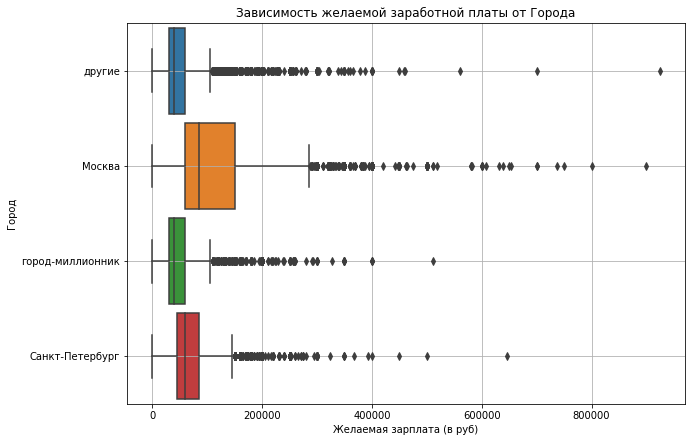

In [17]:
"""Исследование распределения желаемой ЗП в зависимости от города проживания соискателя.
Способ визуализации данных - Коробчатая диаграмма. Библиотека Seaborn.

Отфильтровываем данные по условию ЗП (руб) < 1000000.
"""
mask = data_copy['ЗП (руб)'] < 1000000
# построение Столбчатой диаграммы
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=data_copy[mask],
    x ='ЗП (руб)',
    y ='Город',
    orient='h',
    width=0.9
)
boxplot.set_title('Зависимость желаемой заработной платы от Города');
boxplot.set_xlabel('Желаемая зарплата (в руб)');
boxplot.set_ylabel('Город');
boxplot.grid()

## КОММЕНТАРИИ
* В представленной выгрузке вакансий hh.ru Города, где проживают соискатели, определены в 4 группы:
    - Москва,
    - Санкт-Петербург,
    - город-миллионник,
    - другие.
* Наименьший разброс показателя "желаемая заработная плата" отмечается в двух категориях: "другие" и "город-миллионник" (ширина ящика наименьшая). Здесь же меньше притязания по уровню заработной платы (наименьшая медиана). Однако, если посмотреть на значения выбросов, то в категории "другие" отмечается наибольшее значение по уровню желаемой зарплаты (~ более 900 тыс.руб.)

* Наибольший разброс по уровню зарплаты отмечается в городе Москва, что объясняется и уровнем жизни в данном городе (сопутствующие затраты на проживание и прочее).

* Рассмотрим распределение медианного значения желаемой заработной платы по представленной диаграмме (+ можем использовать фильтрацию по признаку <code>**data_copy[(data_copy['ЗП (руб)'] < 1000000) & (data_copy['Город'] == <категория>)].describe()**</code>):
    - Москва: 85 тыс. руб. (размах - от 50 до 160 тыс.руб.) 
    - Санкт-Петербург: 60 тыс. руб. (размах - от ~ 45 до 85 тыс.руб.)
    - города-миллионники и другие: 40 тыс. руб. (размах - от 30 до 60 тыс.руб.)

* В каждой категории есть наблюдения, где желаемая заработная плата равна 1 руб. Вероятно, при дальнейшем анализе необходимо удалить данные строки.

#### При прогнозе уровня заработной платы важно учитывать признак "Город" по следующим причинам:
- социально-экономическое развитие региона,
- дороговизна жизни (проживание),
- цены на недвижимость и пр.


6) Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [18]:
"""Исследование зависимости медианной желаемой заработной платы от признаков "Готовность к переезду" и "Готовность к командировкам"
Способ визуализации данных - Столбчатая диаграмма. Библиотека Plotly.

Группируем данные по признакам "Готовность к переезду" и "Готовность к командировкам"
"""
def get_russian_ver(arg):
    """Функция возвращает значения "Готов"/ "Не готов",
    соответствующие True/ False в столбце
    """
    if arg == True:
        return 'Готов'
    else:
        return 'Не готов'


data_bar = data_copy.groupby(
    by=['Готовность к переезду', 'Готовность к командировкам'],
    as_index=False
)['ЗП (руб)'].median()

data_bar['Готовность к командировкам'] = data_bar['Готовность к командировкам'].apply(get_russian_ver)

# построение Столбчатой диаграммы
fig = px.bar(
    data_frame = data_bar,
    x='ЗП (руб)',
    y='Готовность к переезду',
    color='Готовность к командировкам',
    barmode='group',
    orientation='h',
    title = 'Зависимость медианной ЗП по готовности к переезду/командировкам"'
);
fig.write_image("data/fig2.png")

<center> <img src=https://raw.githubusercontent.com/LiliyaKazykhanova/SF-DS-Project-1/main/project_1/data/fig2.png>

## КОММЕНТАРИИ
* Сравним МЕДИАННЫЙ уровень желаемой заработной платы в следующих категориях:
    - Готов к переезду и к командировке: ~ 66 тыс.руб.
    - Готов к преезду и НЕ готов к командировке: 50 тыс.руб.
    - НЕ готов к переезду и ГОТОВ к командировке: 60 тыс. руб.
    - НЕ готов к переезду и НЕ готов к командировке: 40 тыс.руб.
* Наиболее высокий уровень (медиана) желаемой зарплаты отмечается в категории соискателей готовых как к переезду, так и к командировке.
* Наименее низкий уровень отмечается в категории соискателей НЕ готовых как к переезду, так и к командировке. Здесь можно отдельно изучить, какие города выбирает данная группа. Возможно, это города из категории "другие", где уровень зарплаты ниже, чем в городах-миллионниках.

7) Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

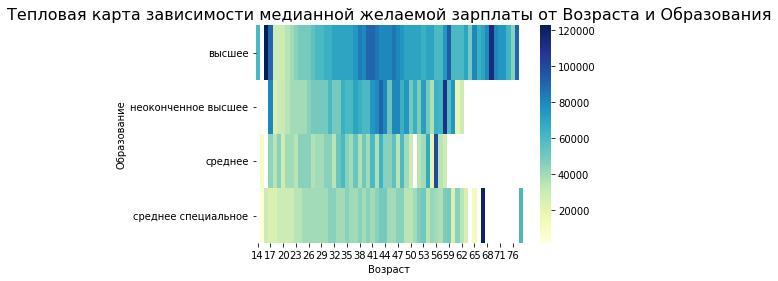

In [19]:
"""Исследование зависимости медианной желаемой заработной платы от Возраста и Образования.
Способ визуализации данных - Тепловая карта. Библиотека Seaborn.

Создаем сводную таблицу: столбцы и строки - данные по Возрасту и Образованию соответственно, значение - медианное знч желаемой ЗП.
"""
pivot = data_copy.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование',
    aggfunc='median'
)

# Построение Тепловой карты
heatmap = sns.heatmap(
    data=pivot,
    cmap='YlGnBu'
)
heatmap.set_title('Тепловая карта зависимости медианной желаемой зарплаты от Возраста и Образования', fontsize=16);

## КОММЕНТАРИИ
* Если рассматривать каждую категорию по Уровню образования отдельно, то можно сделать следующие выводы:
- **"Среднее"**: возраст соискателей до 60 лет. По интенсивности цвета можно отметить то, что преимущественно уровень желаемой ЗП не превышает 60 тыс.руб. Чаще отмечается 20-40 тыс.руб.;
- **"Среднее специальное"**: по мере увеличения возраста соискателя повышается и уровень желаемой зарплаты. Однако максимальное значение ожидаемой зарплаты в большинстве достигает точки в 50-60 тыс.руб.;
- **"Неоконченное высшее"**: в диапазоне от 32 до 60 лет уровень желаемой зарплаты отмечается в диапазоне от 60-80 тыс.руб. и выше;
- **"Высшее"**: от 30 лет уровень желаемой зарплаты отмечается от 80 тыс.руб. и выше. При этом есть единичные наблюдения, когда соискатель до 18 лет отмечает уровень ожидаемой зарплаты более 100 тыс.руб., что является скорее неинформативным признаком (заведомо неверная информация).


8) Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

7


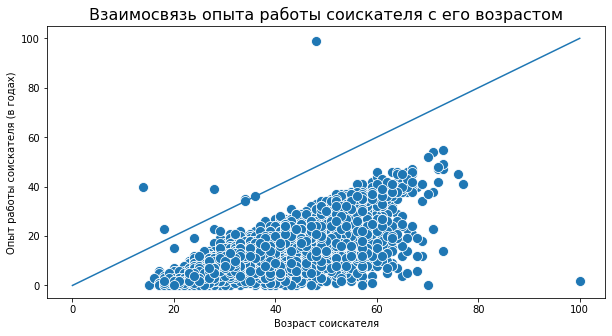

In [20]:
"""Исследование зависимости Опыта работы (в годах) от Возраста.
Способ визуализации данных - Диаграмма рассеяния. Библиотека Seaborn.

Создаем временный признак "Опыт работы (в годах)".
В диаграмме рассеяния дополнительно проводим прямую.
Точки, лежащие на этой прямой и выше нее - аномалии в данных.
"""
data_copy['Опыт работы (в годах)'] = round(data_copy['Опыт работы (месяц)'] / 12)
fig = plt.figure(figsize=(10, 5))

# построение прямой по заданным координатам
lineplot = sns.lineplot(
    x=[0, 100],
    y=[0, 100]
);

# построение Диаграммы рассеяния
scatterplot = sns.scatterplot(
    data=data_copy,
    x='Возраст',
    y= 'Опыт работы (в годах)',
    s=100
);
scatterplot.set_title('Взаимосвязь опыта работы соискателя с его возрастом', fontsize=16);
scatterplot.set_xlabel('Возраст соискателя');
scatterplot.set_ylabel('Опыт работы соискателя (в годах)');

# Расчет количества аномальных наблюдений, где опыт работы (в годах) больше либо равен возрасту соискателя
print(data_copy[data_copy['Опыт работы (в годах)'] >= data_copy['Возраст']]['Возраст'].count())

## КОММЕНТАРИИ
* Точки, лежащие на прямой и выше нее, являются аномалиями. В данных значениях опыт работы больше либо равен возрасту соискателя, что исключено согласно здравому смыслу. Согласно графику число таких наблюдений равно 7.

9) **Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".

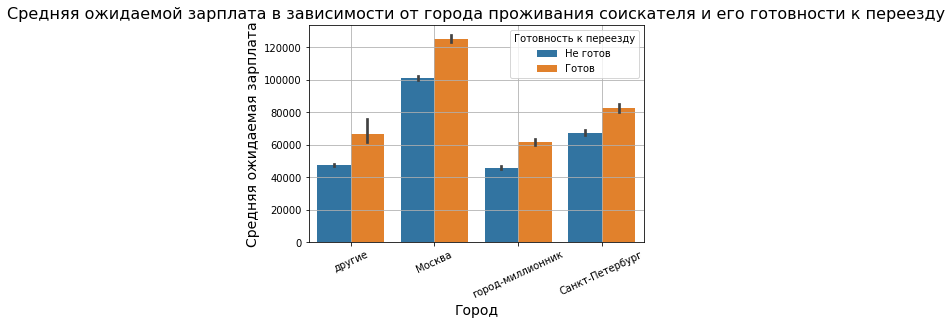

In [21]:
"""Исследование зависимости уровня желаемой заработной платы от Города проживания соискателя и его готовности к переезду.
Способ визуализации данных - Столбчатая диаграмма. Библиотека Seaborn.
"""
ready_to_relocate = data_copy['Готовность к переезду'].apply(get_russian_ver)

barplot = sns.barplot(
    data=data_copy,
    x='Город',
    y='ЗП (руб)',
    hue= ready_to_relocate,
    orient='v'
);
barplot.tick_params(axis='x', rotation=25);
barplot.set_title('Средняя ожидаемой зарплата в зависимости от города проживания соискателя и его готовности к переезду', fontsize=16);
barplot.set_xlabel('Город', fontsize=14);
barplot.set_ylabel('Средняя ожидаемая зарплата', fontsize=14);
barplot.grid()

## КОММЕНТАРИИ
По графику можно отметить следующее:
* Средний уровень ожидаемой зарплаты соискателей из всех категорий городов всегда выше при готовности кандидата к переезду,
* Средний уровень ожидаемой зарплаты у соискателей из г.Москва выше, чем у кандидатов из других городов, вне зависимости от готовности соискателя к переезду,
* Ср.уровень ожидаемой зарплаты самый высокий в г.Москва, далее - Санкт-Петербург, "другие" и города-миллионники.

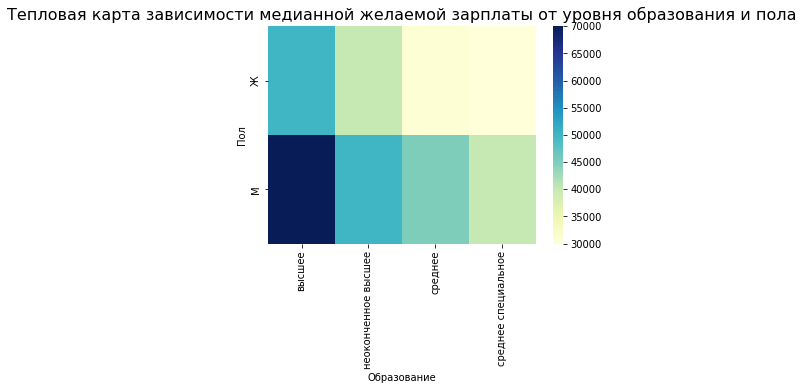

In [22]:
"""Исследование зависимости медианной желаемой заработной платы от Образования и Пола.
Способ визуализации данных - Тепловая карта. Библиотека Seaborn.
Создаем сводную таблицу:
* столбцы и строки - данные по Образованию и Полу соответственно,
* значение - медианное знч желаемой ЗП.
"""
# Создаем Сводную таблицу: даты и страны, % вакцинированных
pivot = data_copy.pivot_table(
    values='ЗП (руб)',
    columns='Образование',
    index='Пол',
    aggfunc='median'
)

# Построение графика (Seaborn) - Тепловая карта
heatmap = sns.heatmap(
    data=pivot,
    cmap='YlGnBu'
);
heatmap.set_title('Тепловая карта зависимости медианной желаемой зарплаты от уровня образования и пола', fontsize=16);

## КОММЕНТАРИИ
* По графику можно отметить следующее - медианный уровень желаемой зарплаты растет по мере повышения уровня образования.
Однако картинка роста уровня желаемой зп разная в зависимости от пола соискателя.
    - соискатели мужского пола:
        * среднее и среднее специальное - 40-45 тыс.руб.
        * неоконченное высшее - 50 тыс.руб.
        * высшее - 70 тыс.руб.
    - соискатели женского пола:
        * среднее и среднее специальное - 30 тыс.руб.
        * неоконченное высшее - 40 тыс.руб.
        * высшее - 50 тыс.руб.
* Причина различия в уровне желаемой зп может быть отдельно исследована как с точки зрения дальнейшего анализа зависимостей признаков (опыт работы, специальность - может соискатели женского пола НЕ работают в тех проф.областях, где высокий уровень зп - и пр.), так и с психологической точки зрения.

# Очистка данных

1) Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [23]:
"""Определение числа полных дубликатов и их удаление.
-> Создаем список столбцов dupl_columns, по которым будем искать совпадения.
-> Создаем маску дубликатов с помощью метода duplicated() и произведем фильтрацию.
-> Заносим результат в переменную hh_duplicates.
-> Вывод числа строк в результирующем DataFrame
-> Применим метод drop_duplicates() для удаления повторяющихся записей из таблицы. 
-> Создадим новую таблицу hh_dedupped, которая будет версией исходной таблицы, очищенной от полных дубликатов.
"""
dupl_columns = list(data_copy.columns)
mask = data_copy.duplicated(subset=dupl_columns)

hh_duplicates = data_copy[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

hh_dedupped = data_copy.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')

Число найденных дубликатов: 161
Результирующее число записей: 44583


2) Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [24]:
"""Вывод информации о числе пропусков в столбцах
с помощью метода .info().sum()
"""
display(hh_dedupped.isnull().sum())

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
полный день                          0
частичная занятость                  0
сменный график                       0
проектная работа                     0
гибкий график                        0
волонтерство                         0
удалённая работа                     0
стажировка                           0
вахтовый метод                       0
ЗП (руб)                             0
Опыт работы (в годах)              168
dtype: int64

3) Итак, у нас есть пропуски в 3-х столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [25]:
"""В пункте 2. были выявлены 3 столбца с пропусками:
    - "Опыт работы (месяц)" (временный признак - Опыт работы (в годах)),
    - "Последнее/ нынешнее место работы",
    - "Последняя/ нынешняя должность"
-> Создадим копию исходной таблицы
-> Заполним пропуски в столбце "Опыт работы (месяц)" медианными значениями
-> Удалим записи из столбцов "Последнее/ нынешнее..." и "Последняя/ нынешняя...", в которых есть хотя бы 1 пропуск
"""
drop_data = hh_dedupped.copy()

drop_data = drop_data.fillna(value={'Опыт работы (месяц)': drop_data['Опыт работы (месяц)'].median()})
drop_data = drop_data.dropna(
    subset = ['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'],
    how='any',
    axis=0)

print(drop_data['Опыт работы (месяц)'].mean())
print(display(drop_data.shape[0]))

114.35777573405711


44581

None


4) Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [26]:
"""Очистка данных вручную:
-> Проверим с помощью фильтрации наличие записей, соответствующих условию:
    ЗП либо выше 1 млн. рублей, либо ниже 1 тыс.рублей
-> Удалим соответствующие записи (строки)
"""
outliers = drop_data[(drop_data['ЗП (руб)'] < 1000) | (drop_data['ЗП (руб)'] > 1000000)]
print(f'Количество выбросов: {outliers.shape[0]}')

cleaned = drop_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')

Количество выбросов: 89
Результирующее число записей: 44492


5) В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [27]:
"""Очистка данных вручную:
-> Проверим с помощью фильтрации наличие записей, соответствующих условию:
    Опыт работы либо равен, либо больше возраста соискателя
-> Удалим соответствующие записи (строки)
"""
outliers = cleaned[cleaned['Опыт работы (в годах)'] >= cleaned['Возраст']]
print(f'Количество выбросов: {outliers.shape[0]}')

cleaned_data = cleaned.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned_data.shape[0]}')

Количество выбросов: 7
Результирующее число записей: 44485


6) В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

31137     15
32950     15
33654    100
Name: Возраст, dtype: int64
Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


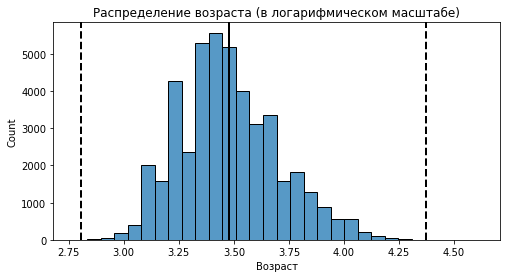

In [28]:
"""Исследование распределения признака Возраста в логарифмическом масштабе
с помощью метода 3х сигм
"""
def outliers_z_score(data, feature, log_scale=False):
    """Функция принимает в качестве аргумента DF, признак (в котором ищем выбросы), параметр логарифмирования (по умолчанию = False)
    Функция возвращает значения выбросов и очищенные от выбросов данные
    """
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
        
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    
    return outliers, cleaned


# Применим эту функцию к таблице и признаку, а также выведем размерности результатов
outliers, cleaned = outliers_z_score(cleaned_data, 'Возраст', log_scale=True)
print(outliers['Возраст'])
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

# построение графика
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(cleaned_data['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределение возраста (в логарифмическом масштабе)');

## КОММЕНТАРИИ
* По методу z-отклонений 3 наблюдения были определены как "выбросы" (с учетом послабления в правую сторону). Это 2 соискателя в возрасте 15 лет и 1 соискатель в возрасте 100 лет;
* Среднее значение находится правее моды, что свойственно правосторонней ассиметрии.

# Выводы

#### *Результатом выполнения п.1 "Исследование структуры данных" можно отметить следующие выводы по данным:*
- Размерность таблицы (44744, 12), где 44744 - количество наблюдений, а 12 - число признаков;
- Тип данных - object;
- В трех столбцах имеются пропуски в данных:
	* Опыт работы;
	* Последнее/ нынешнее место работы;
	* Последняя/ нынешняя должность.
- Наиболее часто соискатели:
	* ищут работу на должность "Системный администратор", при этом эта же позиция часто отмечается в столбце "Последняя/ нынешняя должность";
	* ищут работу на Полную занятость и Полный день;
	* не указывают наличие Авто.

#### *В ходе выполнения п.2 "Преобразование данных" были преобразованы 7 столбцов (признаков).*
* Получено 24 столбца-признака.

#### *При выполнении п.3 "Исследование зависимостей в данных" были получены следующие выводы:*
- Возраст большинства соискателей находится в диапазоне от 27 до 36 лет, при этом наиболее часто отмечается возраст 30 лет;
- Опыт работы большинства соискателей находится в диапазоне от 5 до 13 лет, наиболее часто отмечается опыт работы около 7 лет:
	* Присутствуют некорректные значения, где опыт работы равен или больше возраста соискателя;
- Уровень желаемой зарплаты большинства соискателей находится в диапазоне от 37 тыс.руб. до 95 тыс.руб., наиболее часто отмечается 50 тыс.руб.:
	* Присутствуют выбросы (значения показателя от 1 млн. руб. до 24 млн. руб.), которые сжали изображение графиков;
- Наибольший уровень желаемой зп отмечается у соискателей с высшим образованием:
	* Согласно внешним источникам уровень зп меняется от факта наличия/ отсутствия высшего образования;
	При дальнейшем анализе можно преобразовать данный столбец на булевы значения.
- Наибольший уровень желаемой зп отмечается у соискателей из г.Москва. При этом неважно: готов соискатель к переезду или нет:
	* Согласно внешним источникам при прогнозе уровня зп важно учитывать признак Город по ряду факторов (социально-экономические);
- Соискатели, готовые как к переезду, так и к командировке, отмечают наиболее высокий уровень зп;
- По мере увеличения возраста соискателя повышение требования к высокой заработной плате отмечается только у соискателей с неоконченным высшим и высшим уровнем образования;
- По мере повышения уровня образования растет и медианный уровень желаемой зп вне зависимости от пола;
    * Однако картинка роста разная. Соискатели женского пола указывают меньший уровень зп при одинаковом уровне образования с соискателями мужского пола.
    * Необходимо изучить: специальность и должность соискателей по полу (возможно, соискатели женского пола в большинстве случаев не работают в той проф.области, где высокий уровень зп)

#### *В результате выполнения п.4 "Очистка данных" были удалены записи:*
- с **полными дубликатами**;
- где присутствует **хотя бы 1 пропуск**;
- **соответствующие условиям**.

Заполнены медианными значениями пропуски в столбце "Опыт работы (месяц)";
Проведено исследование распределения признака "Возраст" в логарифмическом масштабе с помощью метода 3-х сигм, с послаблением в правую сторону.